In [14]:

import csv
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten,Dropout,Lambda
from keras.layers import Cropping2D
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras import optimizers
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy import signal

In [15]:
filename = "C:\\Users\\laljarus\\Documents\\GitHub\\Test\\driving_log.csv"
FolderPath = "C:\\Users\\laljarus\\Documents\\GitHub\\Test\\IMG\\"
SteerAngRaw = []
CenterImgPath = []
LeftImgPath = []
RightImgPath = []


with open(filename) as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:        
        
        FileNameCentre = line[0].split("\\")[-1]
        CenterImgPath.append(FileNameCentre)
        
        FileNameLeft = line[1].split("\\")[-1]
        LeftImgPath.append(FileNameLeft)
        
        FileNameRight = line[1].split("\\")[-1]
        RightImgPath.append(FileNameRight)
        
        SteerAngRaw.append(float(line[3]))



In [114]:
N = 5
window_array = np.ones(N)/N
SteerAngFilt = np.convolve(SteerAngRaw,window_array,mode = 'same')

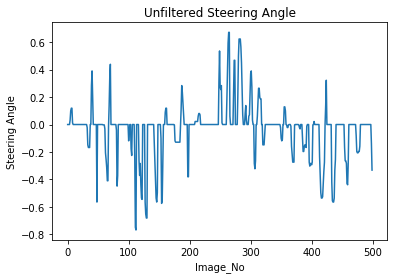

In [82]:
%matplotlib inline

plt.plot(SteerAngRaw[2000:2500])
plt.title('Unfiltered Steering Angle')
plt.xlabel('Image_No')
plt.ylabel('Steering Angle')

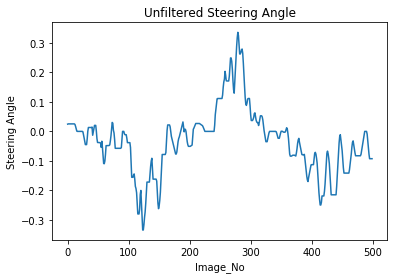

In [83]:
plt.plot(SteerAngFilt[2000:2500])
plt.title('Unfiltered Steering Angle')
plt.xlabel('Image_No')
plt.ylabel('Steering Angle')

In [95]:
SampleTime = 0.07 # 142 images in 10 seconds
L = len(SteerAngRaw)
f = np.arange(0,L/2,dtype = float)/(SampleTime*L)
f_normalized = f*SampleTime*2
FreqRes = fft(SteerAngRaw)
FreqResAbs = np.abs(FreqRes)
PowerDensity = np.power(FreqResAbs,2)/L

C:\ProgramData\Anaconda3\envs\carnd-term1-gpu\lib\site-packages\matplotlib\figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


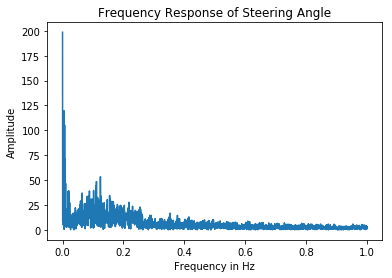

In [97]:
fig1 = plt.figure(1)
plt.plot(f_normalized,FreqResAbs[0:int(L/2+1)])
plt.title('Frequency Response of Steering Angle')
plt.xlabel('Frequency in Hz')
plt.ylabel('Amplitude')
fig1.show()

In [116]:
order,wc = signal.buttord(0.1,0.3,0.25,-60)
b, a = signal.butter(order, wc, 'low', analog=False)
w, h = signal.freqz(b, a)
fs = 14

C:\ProgramData\Anaconda3\envs\carnd-term1-gpu\lib\site-packages\matplotlib\figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


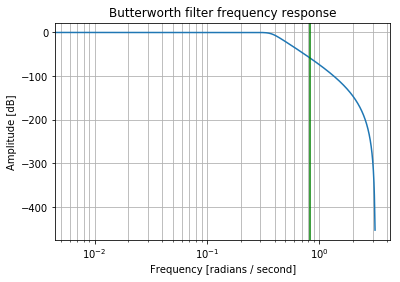

In [117]:
fig3 = plt.figure(3)
plt.plot(w, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
#plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(wc*0.5*fs, color='green') # cutoff frequency
fig3.show()

In [118]:
SteerAng_butter = signal.filtfilt(b,a,SteerAngRaw)

C:\ProgramData\Anaconda3\envs\carnd-term1-gpu\lib\site-packages\matplotlib\figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


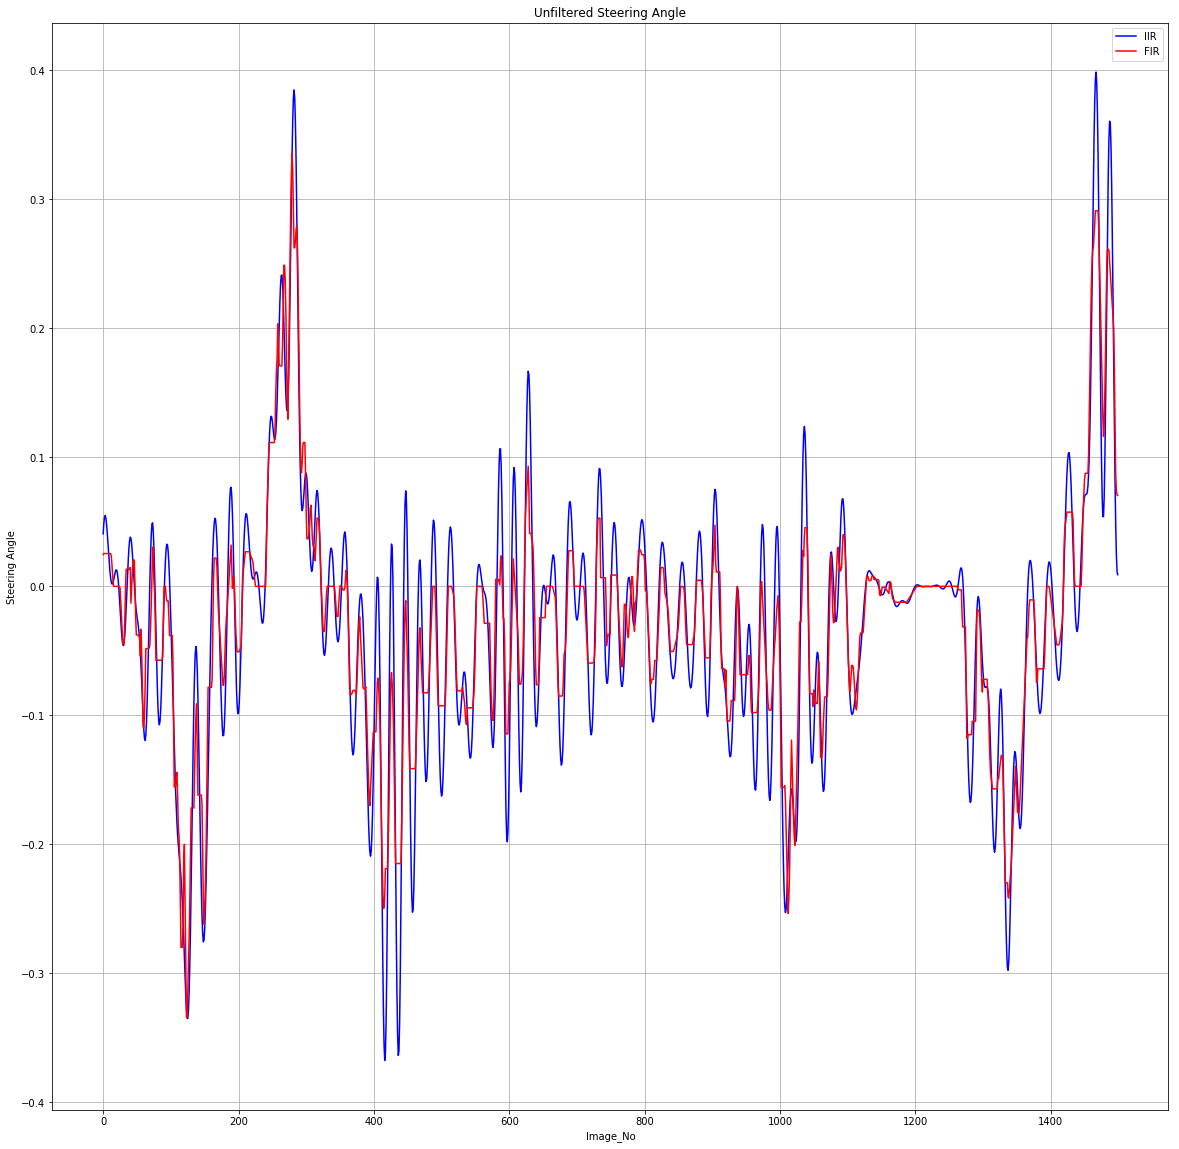

In [115]:
fig4 = plt.figure(4,figsize=(20,20))
plt.plot(SteerAng_butter[2000:3500],'b')
#plt.plot(SteerAngRaw[2000:3500],'g')
plt.plot(SteerAngFilt[2000:3500],'r')
plt.title('Unfiltered Steering Angle')
plt.legend(['IIR','FIR'])
plt.xlabel('Image_No')
plt.grid(which='both', axis='both')
plt.ylabel('Steering Angle')
fig4.show()